EDA

TSV ke DataFrame

In [25]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import re

In [2]:
tsv_file_path = "train_preprocess.tsv.txt"

data_text = []
label = []

with open(tsv_file_path, encoding='utf-8') as tsvfile:
    tsv_reader = csv.reader(tsvfile, delimiter='\t')
    for row in tsv_reader:
        data_text.append(row[0])
        label.append(row[1])

df = pd.DataFrame({'data_text': data_text, 'label': label})

Check Data 
Data dibawah menunjukan bahwa dataset terdiri dari 11000 rows dan 2 columns

In [3]:
df

,data_text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


Check Missing Value dan Duplicate
Setelah di check terdapat duplicate data sebanyakan 67 dan tidak ada missing value.

In [4]:
missing_values = df.isnull().sum().sum()
duplicates = df.duplicated().sum()
print("Missing Values:")
print(missing_values)
print("\nDuplicate Data:")
print(duplicates)


Missing Values:
0

Duplicate Data:
67


Drop Duplicate

In [5]:
df = df.drop_duplicates()
duplicates_after_drop = df.duplicated().sum()
print("Jumlah duplicates setelah dropping:", duplicates_after_drop)

Jumlah duplicates setelah dropping: 0


**Visualisasi**

Jumlah Data Sentiment pada Column Label 
Terdiri dari :
- Positive 58.4 % / 6383 Tweets
- Negative 31.2 % / 3412 Tweets
- Neutral 10.4 % / 1138 Tweets

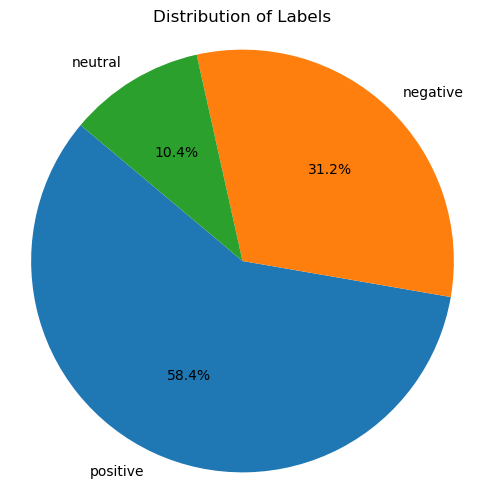

Jumlah label:
positive    6383
negative    3412
neutral     1138
Name: label, dtype: int64


In [6]:
label_counts = df['label'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.axis('equal')
plt.show()

print("Jumlah label:")
print(label_counts)

Jumlah Kata dalam Suatu Kalimat
Data Grafik Batang dibawah menunjukan rata-rata jumlah kata dalam suatu kalimat pada data kolom data_text.
Dengan rata-rata yaitu 33 kata dan nilai tengahnya berada di 28 kata.

C:\Users\user\AppData\Local\Temp\ipykernel_5428\3435712689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['data_text'].apply(lambda x: len(str(x).split()))


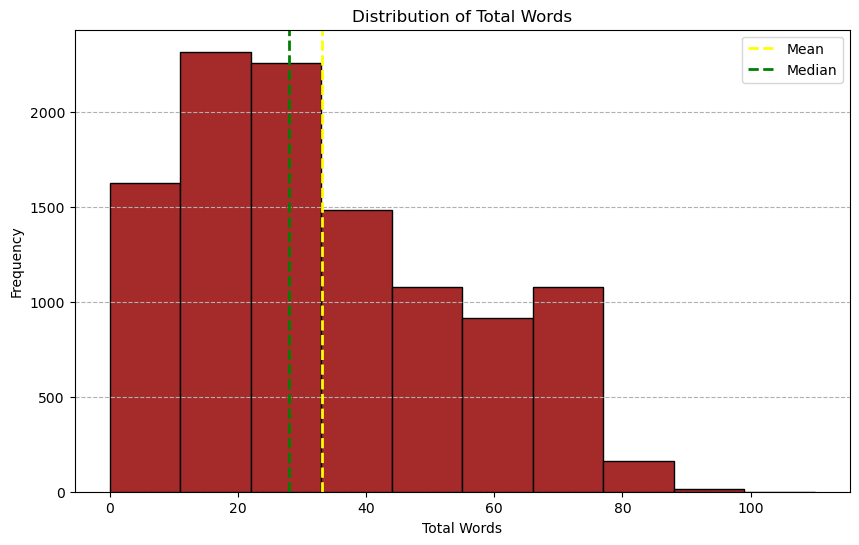

Median Word Count: 28.0
Mean Word Count: 33.060550626543495


In [7]:
df['word_count'] = df['data_text'].apply(lambda x: len(str(x).split()))

word_distribution = df['word_count'].value_counts().sort_index()
median_word_count = df['word_count'].median()
mean_word_count = df['word_count'].mean()

plt.figure(figsize=(10, 6))
bins = range(0, df['word_count'].max() + 1, int(df['word_count'].max() / 10))
plt.hist(df['word_count'], bins=bins, edgecolor='black', color='brown')
plt.xlabel('Total Words')
plt.ylabel('Frequency')
plt.title('Distribution of Total Words')
plt.grid(axis='y', linestyle='--')

plt.axvline(mean_word_count, color='yellow', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_word_count, color='green', linestyle='dashed', linewidth=2, label='Median')
plt.legend()

plt.show()

# Print the median and mean word count
print("Median Word Count:", median_word_count)
print("Mean Word Count:", mean_word_count)

Jumlah 20 Kata Terbanyak
Dalam grafik batang dibawah menunjukan nilai 20 kata terbanyak.

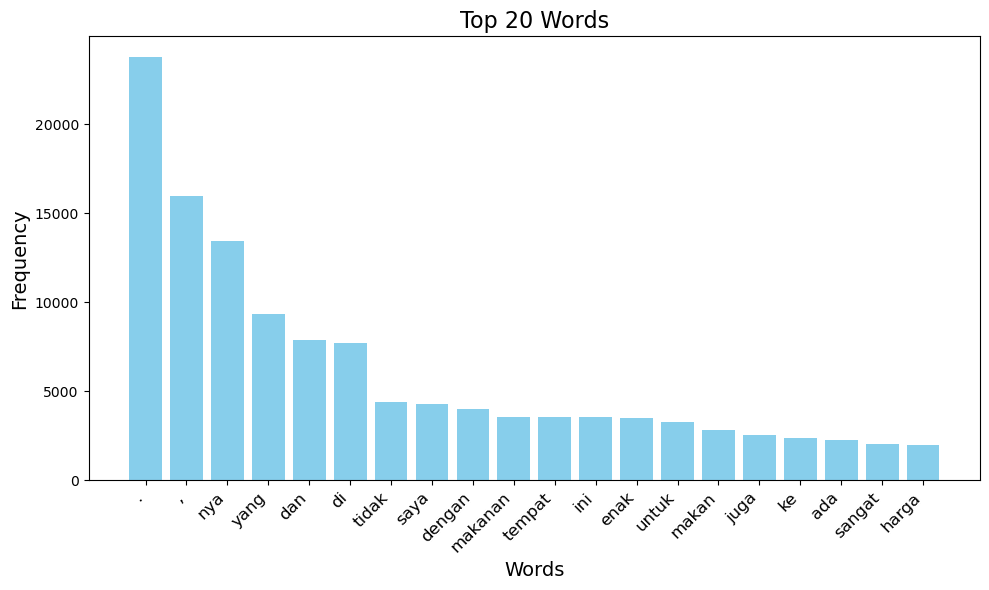

        Word  Frequency
16         .      23759
18         ,      15959
42       nya      13458
7       yang       9317
53       dan       7879
14        di       7707
43     tidak       4373
161     saya       4301
45    dengan       4008
119  makanan       3563
69    tempat       3540
1        ini       3533
76      enak       3523
132    untuk       3291
292    makan       2824
84      juga       2557
205       ke       2377
154      ada       2292
77    sangat       2042
36     harga       1976


In [8]:
all_words = ' '.join(df['data_text']).split()

word_freq = Counter(all_words)

word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

word_freq_df.sort_values(by='Frequency', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.bar(word_freq_df['Word'][:20], word_freq_df['Frequency'][:20], color='skyblue')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Words', fontsize=16)
plt.tight_layout()
plt.show()

print(word_freq_df.head(20))


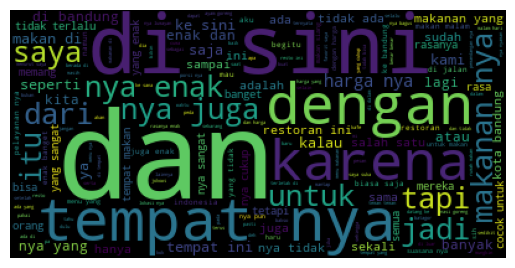

In [13]:
text = ' '.join(df['data_text'])
wordcloud = WordCloud().generate(text)

# Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [14]:
df['label']

0        positive
1         neutral
2        positive
3        positive
4        negative
           ...   
10993     neutral
10994    positive
10996    positive
10998    negative
10999    positive
Name: label, Length: 10933, dtype: object

In [17]:
cek_positive = df.loc[df['label'] == 'positive']

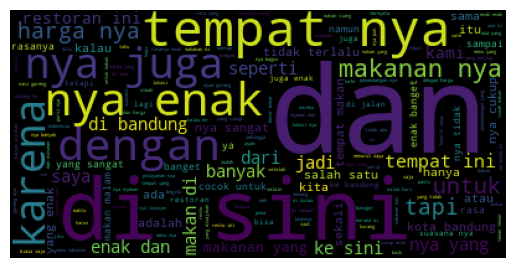

In [19]:
text = ' '.join(cek_positive['data_text'])
wordcloud = WordCloud().generate(text)

# Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

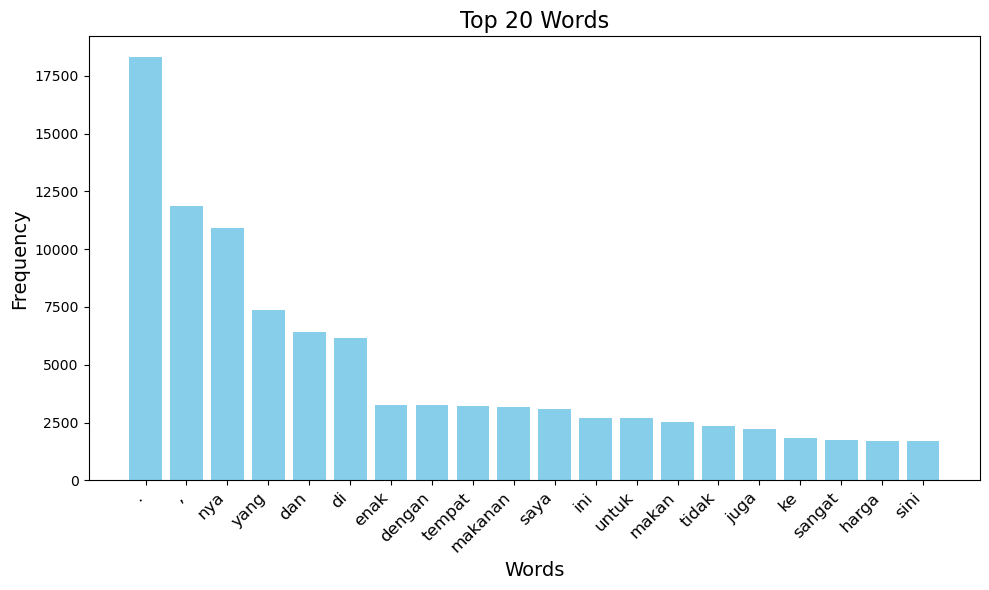

        Word  Frequency
16         .      18293
18         ,      11856
42       nya      10911
7       yang       7365
77       dan       6421
14        di       6176
61      enak       3271
45    dengan       3238
54    tempat       3219
83   makanan       3164
118     saya       3090
1        ini       2690
96     untuk       2688
196    makan       2503
43     tidak       2349
69      juga       2207
283       ke       1852
62    sangat       1738
36     harga       1693
136     sini       1680


In [20]:
positive_words = ' '.join(cek_positive['data_text']).split()

word_freq = Counter(positive_words)

word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

word_freq_df.sort_values(by='Frequency', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.bar(word_freq_df['Word'][:20], word_freq_df['Frequency'][:20], color='skyblue')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Words', fontsize=16)
plt.tight_layout()
plt.show()

print(word_freq_df.head(20))


In [21]:
cek_negative = df.loc[df['label'] == 'negative']

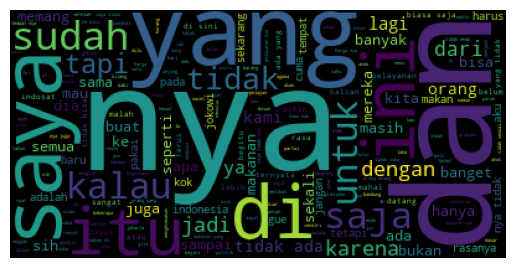

In [23]:
text = ' '.join(cek_negative['data_text'])
wordcloud = WordCloud().generate(text)

# Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

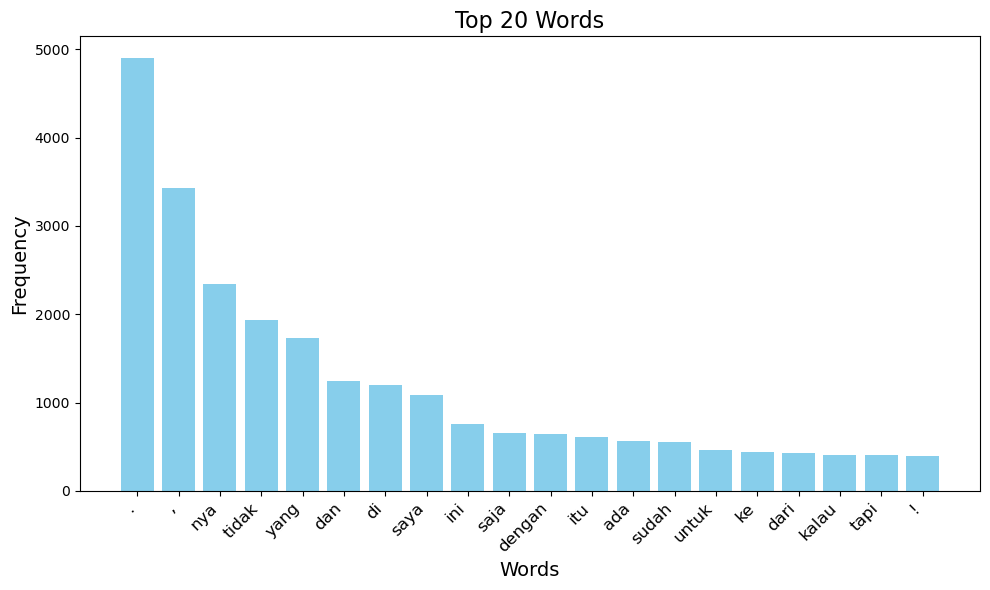

       Word  Frequency
1         .       4901
15        ,       3428
24      nya       2342
16    tidak       1932
13     yang       1733
44      dan       1243
132      di       1197
204    saya       1082
66      ini        761
86     saja        655
74   dengan        640
205     itu        615
354     ada        564
21    sudah        556
79    untuk        459
49       ke        436
188    dari        431
102   kalau        412
147    tapi        406
171       !        394


In [24]:
negative_words = ' '.join(cek_negative['data_text']).split()

word_freq = Counter(negative_words)

word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

word_freq_df.sort_values(by='Frequency', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.bar(word_freq_df['Word'][:20], word_freq_df['Frequency'][:20], color='skyblue')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Words', fontsize=16)
plt.tight_layout()
plt.show()

print(word_freq_df.head(20))


In [27]:
def processing_text(input_text):
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b', 'EMAIL', input_text) #ganti email ke kata 'EMAIL'
    text = text.lower() # jadikan lowercase semua
    text = re.sub(r'[^\w\s]', '', text) # hapus semua punctuation (tanda baca)
    text = text.replace(" 62"," 0")
    text = re.sub(r"\b\d{4}\s?\d{4}\s?\d{4}\b", "NOMOR_TELEPON", text) #ganti nomor telepon ke kata 'NOMOR_TELEPON'
    text = text.replace("USER","")
    text = text.strip()

    return text

In [28]:
for idx, data_text in enumerate(data_text):
    cleaned_tweet = processing_text(data_text)
    print(cleaned_tweet)
    
    if idx == 10:
        break

warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung  tahu berkualitas  dipadu keahlian memasak  dipadu kretivitas  jadilah warung yang menyajikan menu utama berbahan tahu  ditambah menu umum lain seperti ayam  semuanya selera indonesia  harga cukup terjangkau  jangan lewatkan tahu bletoka nya  tidak kalah dengan yang asli dari tegal
mohon ulama lurus dan k212 mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecahpecah
lokasi strategis di jalan sumatera bandung  tempat nya nyaman terutama sofa di lantai 2  paella nya enak  sangat pas dimakan dengan minum bir dingin  appetiser nya juga enakenak
betapa bahagia nya diri ini saat unboxing paket dan barang nya bagus  menetapkan beli lagi
duh  jadi mahasiswa jangan sombong dong  kasih kartu kuning segala  belajar dulu yang baik  tidak usahlah ikutikut politik  nanti sudah selesai kuliah nya mau ikut politik juga tidak telat  dasar mahasiswa
makanan beragam  harga makana

In [29]:
df['cleaned_text'] = df['data_text'].apply(lambda x: processing_text(x))

C:\Users\user\AppData\Local\Temp\ipykernel_5428\873111647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['data_text'].apply(lambda x: processing_text(x))


In [31]:
df

,data_text,label,word_count,cleaned_text
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,66,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,17,mohon ulama lurus dan k212 mmbri hujjah partai...
2,lokasi strategis di jalan sumatera bandung . t...,positive,33,lokasi strategis di jalan sumatera bandung te...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,17,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,38,duh jadi mahasiswa jangan sombong dong kasih...
...,...,...,...,...
10993,f - demokrat dorong upaya kemandirian energi n...,neutral,8,f demokrat dorong upaya kemandirian energi na...
10994,tidak bosan,positive,2,tidak bosan
10996,enak rasa masakan nya apalagi kepiting yang me...,positive,26,enak rasa masakan nya apalagi kepiting yang me...
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative,13,pagi pagi di tol pasteur sudah macet parah bi...


In [32]:
cek_negative = df.loc[df['label'] == 'negative']

In [33]:
cek_negative

,data_text,label,word_count,cleaned_text
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,38,duh jadi mahasiswa jangan sombong dong kasih...
6,pakai kartu kredit bca tidak untung malah rugi...,negative,9,pakai kartu kredit bca tidak untung malah rugi...
10,simcard indosat inaktiv gara-gara lupa isi pul...,negative,19,simcard indosat inaktiv garagara lupa isi puls...
11,sifat iri sering muncul pada orang orang yang ...,negative,12,sifat iri sering muncul pada orang orang yang ...
13,"pengalaman bersama indosat hari ini , semoga t...",negative,20,pengalaman bersama indosat hari ini semoga ti...
...,...,...,...,...
10982,tolong dibaca pesan saya ! di dalam kotak hand...,negative,19,tolong dibaca pesan saya di dalam kotak handp...
10985,"sumpah gue kecewa banget dengan sms , cuma tea...",negative,24,sumpah gue kecewa banget dengan sms cuma teas...
10989,tadinya pengin mengantar teman dari kalau ke r...,negative,49,tadinya pengin mengantar teman dari kalau ke r...
10991,dapat rom awal abad,negative,4,dapat rom awal abad


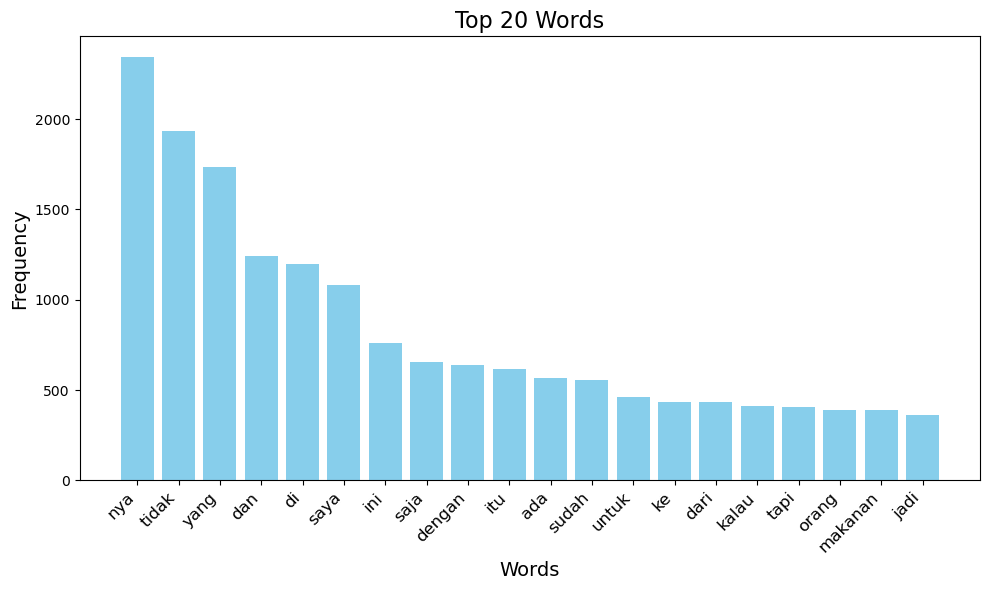

        Word  Frequency
22       nya       2342
14     tidak       1932
12      yang       1733
42       dan       1243
128       di       1197
199     saya       1082
64       ini        761
84      saja        655
72    dengan        640
200      itu        615
347      ada        564
19     sudah        556
77     untuk        459
47        ke        436
183     dari        431
99     kalau        412
143     tapi        406
57     orang        391
108  makanan        388
1       jadi        364


In [35]:
negative_words = ' '.join(cek_negative['cleaned_text']).split()

word_freq = Counter(negative_words)

word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

word_freq_df.sort_values(by='Frequency', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.bar(word_freq_df['Word'][:20], word_freq_df['Frequency'][:20], color='skyblue')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Words', fontsize=16)
plt.tight_layout()
plt.show()

print(word_freq_df.head(20))

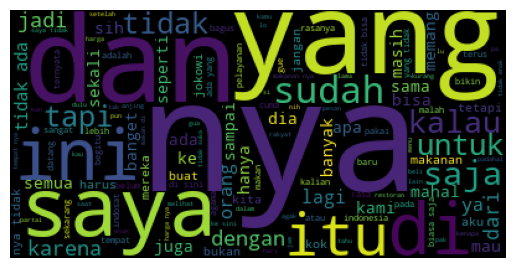

In [36]:
text = ' '.join(cek_negative['cleaned_text'])
wordcloud = WordCloud().generate(text)

# Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()